### CCO50- Digital Speech Processing  
# Short Test 5

**Description:** Design an FIR filter (q[n]) of order M = 5 to cut-off frequencies within the range 2500 Hz ~ 3500 Hz, allowing for all the others to pass through. Assume that the input signal to be filtered (x[n]) was sampled at 10000 samples per second

In order to calculate thge band-stop FIR Q[n], we need to sum H[n] and G[n].
H to be calculated at the 2500Hz and G at 3500Hz 

$$

h[n] = \frac{\sin{(\omega_c (n - \frac{M}{2}))}}{\pi (n - \frac{M}{2})}
\\\\
M = 5
\\\\ 
0 \leq n \leq 5
\\\\
\pi = 5kHz
\\\\
\omega_h = 2,5kHz = \frac{\pi}{2}
\\\\\\
$$
To high-pass filter, let use the complement
$$
    \omega_g = 5kHz - 3,5kHz = 1,5kHZ = \frac{3\pi}{10}
$$

First, calculate a low-pass filter $h[]$ using the $\omega_h$:
$$
h[0] = \frac{\sin{(\frac{\pi}{2} (0 - \frac{5}{2}))}}{\pi (0 - \frac{5}{2})} = -0.09003163
\\
h[1] = \frac{\sin{(\frac{\pi}{2} (1 - \frac{5}{2}))}}{\pi (1 - \frac{5}{2})} =  0.15005272
\\
h[2] = \frac{\sin{(\frac{\pi}{2} (2 - \frac{5}{2}))}}{\pi (2 - \frac{5}{2})} =  0.45015816
\\
h[3] = \frac{\sin{(\frac{\pi}{2} (3 - \frac{5}{2}))}}{\pi (3 - \frac{5}{2})} =  0.45015816
\\
h[4] = \frac{\sin{(\frac{\pi}{2} (4 - \frac{5}{2}))}}{\pi (4 - \frac{5}{2})} =  0.15005272
\\
h[5] = \frac{\sin{(\frac{\pi}{2} (5 - \frac{5}{2}))}}{\pi (5 - \frac{5}{2})} = -0.09003163 
\\

$$

$$h = ( -0.09,  0.15,  0.45,  0.45, 0.15, -0.09 )$$

Second, calculate a high-pass filter $g[]$ using the $\omega_g$:
$$
h[0] = \frac{\sin{(\frac{3\pi}{10} (0 - \frac{5}{2}))}}{\pi (0 - \frac{5}{2})} = 0.09003163
\\
h[1] = \frac{\sin{(\frac{3\pi}{10} (1 - \frac{5}{2}))}}{\pi (1 - \frac{5}{2})} = 0.20959398
\\
h[2] = \frac{\sin{(\frac{3\pi}{10} (2 - \frac{5}{2}))}}{\pi (2 - \frac{5}{2})} = 0.28901933
\\
h[3] = \frac{\sin{(\frac{3\pi}{10} (3 - \frac{5}{2}))}}{\pi (3 - \frac{5}{2})} = 0.28901933
\\
h[4] = \frac{\sin{(\frac{3\pi}{10} (4 - \frac{5}{2}))}}{\pi (4 - \frac{5}{2})} = 0.20959398
\\
h[5] = \frac{\sin{(\frac{3\pi}{10} (5 - \frac{5}{2}))}}{\pi (5 - \frac{5}{2})} = 0.09003163
\\

$$

$$h = ( 0.09 0.209 0.289 0.289 0.209 0.09 )$$

Now, reverse $h[]$ and invert every odd index to have $g[]$
$$g = (0.09, -0.209,  0.289, -0.289,  0.209, -0.09)

Then, sum $h[]$ and $g[]$

$$
 q = (-0.09 + 0.09,  0.15 -0.209,  0.45 + 0.289,  0.45-0.289, 0.15 + 0.209, -0.09 - 0.09)
 \\
 q = (0, -0.059, 0.739, 0.161, 0.359, -0.18)
$$

##### Implementing the filter in python, based on the previous implementations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyaudio

In [2]:
def low_pass_filter(cutoff, sample_rate, M=5):
    nyq = sample_rate / 2
    omega = cutoff / nyq
    h = np.zeros(M+1)
    for n in range(M+1):
        if n == (M/2):
            h[n] = 1.0
        else:
            h[n] = (np.sin(np.pi * omega * (n - (M/2)))/(np.pi * (n - (M/2))))
    return h

In [3]:
def high_pass_filter(cutoff, sample_rate, M=5):
    if M % 2 == 0:
        M -= 1
    cutoff = sample_rate / 2 - cutoff
    g = low_pass_filter(cutoff, sample_rate, M)
    g = np.array([-val if i % 2 != 0 else val for i, val in enumerate(g)])
    return g

In [8]:
def band_stop_filter(low_cutoff, high_cutoff, sample_rate, M=5):
    low = low_pass_filter(low_cutoff, sample_rate, M)
    high = high_pass_filter(high_cutoff, sample_rate, M)
    return low + high

In [10]:
q = band_stop_filter(2500, 3500, 10000, M=5)
print([f"{val:.6f}" for val in q])

['0.000000', '-0.059541', '0.739177', '0.161139', '0.359647', '-0.180063']


##### Using the Z-tranform to check the filter

In [11]:
def z_transform(x, num_points=1000):
    omega = np.linspace(0, np.pi, num_points)
    z = np.exp(1j * omega)
    X_z = np.zeros_like(z, dtype=complex)
    N = len(x)
    for k in range(N):
        X_z += x[k] * z**(-k)
    return omega, X_z

In [12]:
def plot_z_transform(omega, G_z, name = "G[z]"):
    plt.plot(omega, np.abs(G_z))
    plt.title('Z-Transform of {name}'.format(name=name))
    plt.xlabel('Frequency (omega)')
    plt.ylabel('G(z)')
    plt.grid()
    plt.tight_layout()
    plt.show()


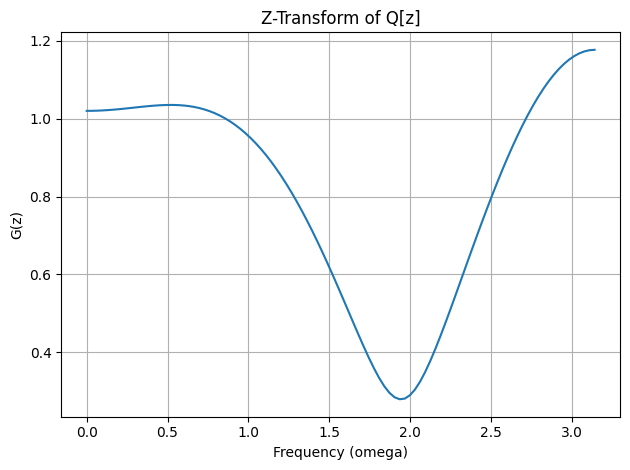

In [14]:
omega, Q_z = z_transform(q, 100)
plot_z_transform(omega, Q_z, name="Q[z]")

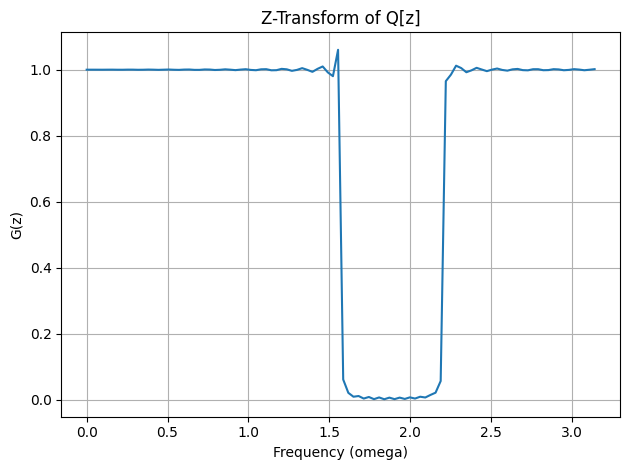

In [17]:
q = band_stop_filter(2500, 3500, 10000, M=501)
omega, Q_z = z_transform(q, 100)
plot_z_transform(omega, Q_z, name = "Q[z]")

### Extra: generating waves and filtering them

In [18]:
#defining util methods
def play_signal(signal, sample_rate=44100):
    p = pyaudio.PyAudio()

    stream = p.open(format=pyaudio.paFloat32,
                    channels=1,
                    rate=sample_rate,
                    output=True)

    stream.write(signal.tobytes())

    stream.stop_stream()
    stream.close()

    p.terminate()

def plot_waveform(wave, label, title):
    plt.figure(figsize=(10, 4))
    plt.plot(wave, label=label)
    plt.title(title)
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid()
    plt.show()

In [19]:
# generating an Am7 chord waves
sample_rate = 1200 # using a lower sample rate for less noisy results and more clarity
seconds = 2
octave = 1 # 1 for central octave, to lower pitch use 1/octave
s_A = (np.sin(2 * np.pi * np.arange(sample_rate * seconds) * 440 * octave / sample_rate)).astype(np.float32)
s_C = (np.sin(2 * np.pi * np.arange(sample_rate * seconds) * 256.63 * octave / sample_rate)).astype(np.float32)
s_E = (np.sin(2 * np.pi * np.arange(sample_rate * seconds) * 329.63 * octave / sample_rate)).astype(np.float32)
s_G = (np.sin(2 * np.pi * np.arange(sample_rate * seconds) * 392 * octave / sample_rate)).astype(np.float32)
s_Am7 = s_A + s_C + s_E + s_G
s_Am7 /= np.max(np.abs(s_Am7))  # Normalize the signal

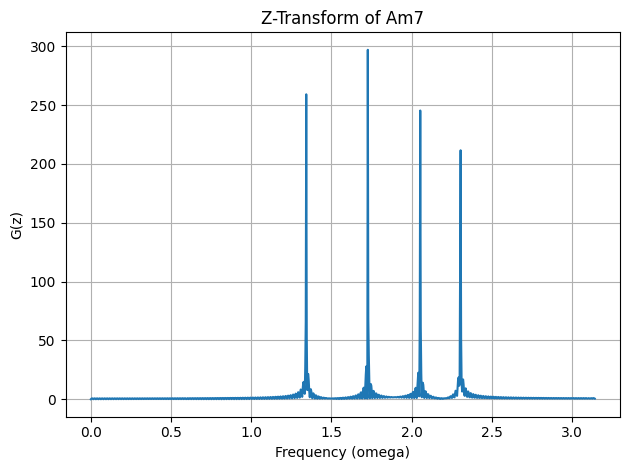

In [20]:
omega, S_z = z_transform(s_Am7, 1000)
plot_z_transform(omega, S_z, name = "Am7")
play_signal(s_Am7, sample_rate)

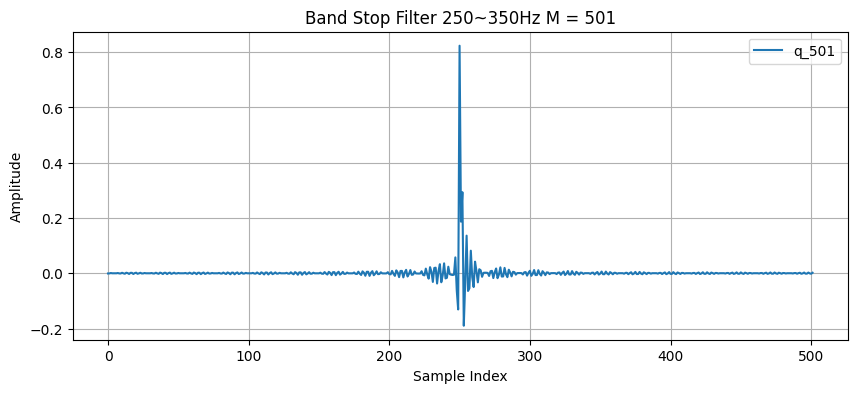

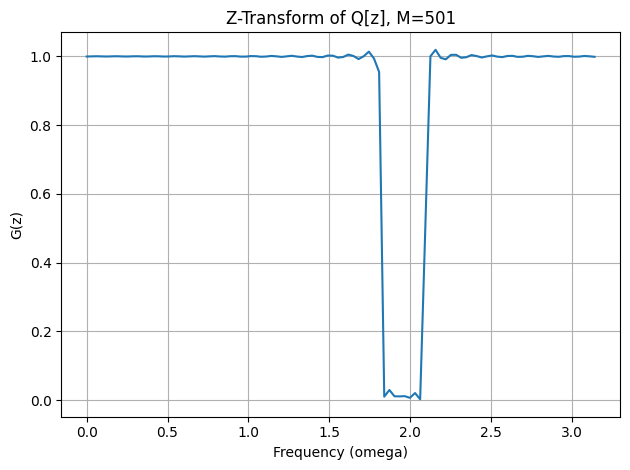

In [23]:
q_5 = band_stop_filter(350, 400, sample_rate, 501)
plot_waveform(q_5, "q_501", "Band Stop Filter 250~350Hz M = 501")
omega, G_z = z_transform(q_5, 100)
plot_z_transform(omega, G_z, name = "Q[z], M=501")

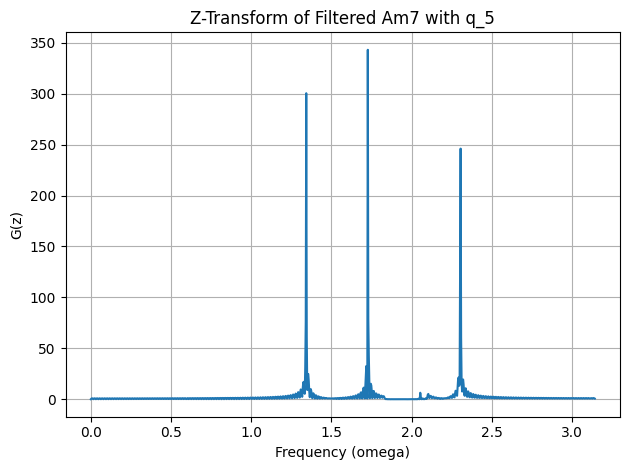

In [24]:
filtered_Am7_g5 = np.convolve(s_Am7, q_5)
filtered_Am7_g5 /= np.max(np.abs(filtered_Am7_g5))  # Normalize the signal
omega, G_z = z_transform(filtered_Am7_g5, 1000)
plot_z_transform(omega, G_z, name = "Filtered Am7 with q_5")
play_signal(filtered_Am7_g5, sample_rate)



**Author:** Matheus Sinto Novaes <br>
**E-mail:** matheus.sinto@unesp.br

**Course:** Digital Speech Processing <br>
**Professor:** Dr. Eng. Rodrigo Capobianco Guido <br>
**Date:** May 8 2025
